# **PART 1 - Exploring the Data** #


Heart Disease Prediction Mini-Project
By: Samuel Kinstlinger and Kevin Si
Sumer of 2022 AI4ALL

This notebook is where you will bring everything you're learning about data, python, and machine learning together. Since this notebook is mostly blank, you'll need to bring code from your Python Practice notebooks in the Lessons into this notebook so you have it all in one place. 

---

You won't need to copy everything from your Python Practice Lessons, and you will need to adapt your code based on your data set and the question you are trying to answer.



---





## Your Research Questions ##
Keep track of your research questions here. These may need to shift as you get more familiar with the data, and that's okay! 



1. Unsupervised Question: Write your unsupervised learning research question here
2. Supervised Question: Write your supervised learning research question here


Supervised Question: How do someones demographics (sex) as well as more complicated tests such as EKG results, Thallium, Max HR, ST Depression, Slope of ST, number of vessels fluro, and BP relate to Heart Disease
Unsupervised Question: How do simple tests and demographics such as cholesterol and age relate to Heart Disease 

Use the text option (also called markdown) to add your descriptions of patterns you are finding in your data set.

Men and older people get heart disease more often than women
Many tests can be used to find out if they have heart disease or if they are more likely to have heart disease

In [110]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns


# Set up dataframe as pokemon.csv file
df=pd.read_csv('Heart_Disease_Prediction.csv', engine='python')

In [111]:
df.groupby('Heart Disease')['EKG results'].mean()

Heart Disease
Absence     0.860
Presence    1.225
Name: EKG results, dtype: float64

In [112]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

# **PART 2 - Data Visualization** #

Text(0.5, 0, 'Age')

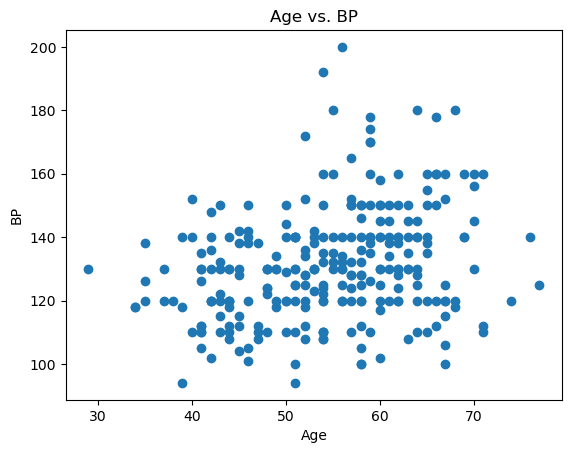

In [113]:
# Scatter Plot
from matplotlib import pyplot as plt 
%matplotlib inline
fig,ax=plt.subplots()
ax.scatter(df['Age'], df['BP'])
ax.set_title('Age vs. BP')
ax.set_ylabel('BP')
ax.set_xlabel('Age')

We chose to d a scatterplot for BP as opposed to Age because we wanted to see the the age and BP breakdown and also see if there were any extreme BP or Age outliers. 

(array([ 69., 160.,  36.,   4.,   1.]),
 array([126. , 213.6, 301.2, 388.8, 476.4, 564. ]),
 <BarContainer object of 5 artists>)

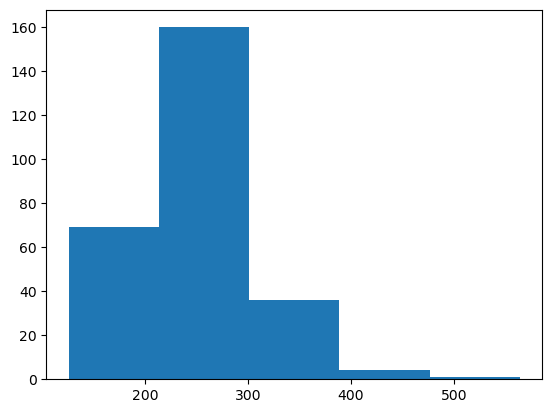

In [114]:
plt.hist(df['Cholesterol'], bins=5)
#Great=c<150
#Good=150-200
#Okay=201-240
#Poor=241-300
#Very Poor= 301+

In [115]:
def Cholesterol_Rating(row):
    if(row['Cholesterol']<150):
        return 'Great'
    elif(row['Cholesterol']<200):
        return 'Good'
    elif(row['Cholesterol']<240):
        return 'Okay'
    elif(row['Cholesterol']<300):
        return 'Poor'
    elif(row['Cholesterol']>=300):
        return 'Very Poor'

df['Cholesterol_Rating']=df.apply(Cholesterol_Rating, axis=1)
df.groupby(by='Cholesterol_Rating')['Cholesterol'].count()

Cholesterol_Rating
Good          35
Great          4
Okay          84
Poor         105
Very Poor     42
Name: Cholesterol, dtype: int64

Text(0, 0.5, 'EKG results')

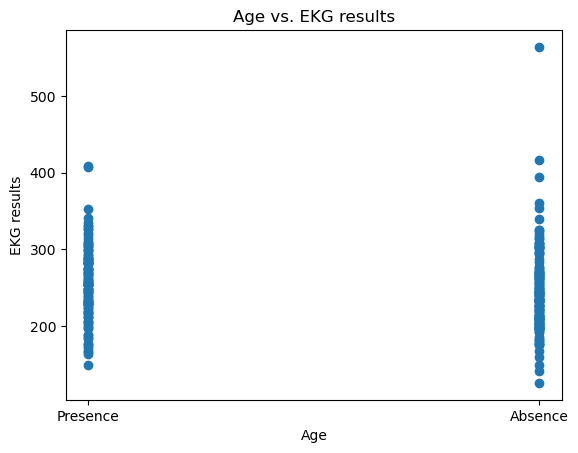

In [116]:
fig, ax=plt.subplots()
ax.scatter(df['Heart Disease'], df['Cholesterol'])
ax.set_title('Age vs. EKG results')
ax.set_xlabel('Age')
ax.set_ylabel('EKG results')

Now we better understand the cholesterol breakdown of our data set. Making a histogram for Cholesterol can help us determine how many bins to use when binning cholesterol. 

# **PART 3 - Feature Engineering** #

In [117]:
# Age, Sex ---- To determine if special tests are needed
# BP, Cholesterol, EKG results, HR/ST Slope ---- to predict the presence of Heart Disease
# Heart Disease ---- Presence we need to know to predict heart disease (what we are predicting)
# 9 restecg: resting electrocardiographic results
# -- Value 0: normal
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# 41 slope: the slope of the peak exercise ST segment
# -- Value 1: upsloping
# -- Value 2: flat
# -- Value 3: downsloping

df['EKG results'].describe()

count    270.000000
mean       1.022222
std        0.997891
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: EKG results, dtype: float64

In [118]:
def Cholesterol_Rating(row):
    if(row['Cholesterol']<150):
        return 'Great'
    elif(row['Cholesterol']<200):
        return 'Good'
    elif(row['Cholesterol']<240):
        return 'Okay'
    elif(row['Cholesterol']<300):
        return 'Poor'
    elif(row['Cholesterol']>=300):
        return 'Very Poor'

df['Cholesterol_Rating']=df.apply(Cholesterol_Rating, axis=1)
df.groupby(by='Cholesterol_Rating')['Cholesterol'].count()

Cholesterol_Rating
Good          35
Great          4
Okay          84
Poor         105
Very Poor     42
Name: Cholesterol, dtype: int64

We chose to bin cholesterol because rating each choesterol based on its semantic meaning as opposed to the actual number for total cholesterol makes it easier to understand. It also groups together total cholseterol numbers with similar effects. 

In [119]:
# df1=df
# df1['Cholesterol']=(df1['Cholesterol']-df1['Cholesterol'].min()) / (df1['Cholesterol'].max()-df1['Cholesterol'].min())
# df1['Cholesterol'].describe()

We are normalizing cholesterol to make it easier for the AI to work with a utilize as a feature when identifying feature relationships

In [120]:
factor=2
upper_limit=df['Cholesterol'].mean() + (df['Cholesterol'].std() * factor)
lower_limit=df['Cholesterol'].mean() - (df['Cholesterol'].std() * factor)
# upper_limit
# lower_limit
df=df[(df['Cholesterol']<upper_limit) & (df['Cholesterol']>lower_limit)]
df=df[(df['BP']<180) & (df['BP']>100)]
df['Cholesterol'].describe()

count    250.000000
mean     245.240000
std       42.247578
min      149.000000
25%      212.000000
50%      243.500000
75%      273.750000
max      353.000000
Name: Cholesterol, dtype: float64

In [121]:
def hdToBinary(row):
    if(row['Heart Disease']=='Absence'):
        return 0
    elif(row['Heart Disease']=='Presence'):
        return 1
df['Heart Disease']=df.apply(hdToBinary,axis=1)
df['Heart Disease'].head(10)

0     1
2     1
3     0
4     0
5     0
6     1
7     1
8     1
10    0
11    0
Name: Heart Disease, dtype: int64

# **PART 4 - Clustering** #

In [122]:
df['EKG']=df['EKG results']

In [123]:
df=df.drop(df[df.EKG==1].index)

In [124]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [125]:
# cluster_data=df[['EKG','Heart Disease']]
# range_n_clusters=[4]
# for n_clusters in range_n_clusters:
#     clusterer=KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels=clusterer.fit_predict(cluster_data)
#     silhouette_avg = silhouette_score(cluster_data, cluster_labels)
#     print("For num_clusters = ", n_clusters,
#         "The average silhouette coefficient is:", silhouette_avg)

In [126]:
# def chRound(row):
#     if(row['Cholesterol']<200):
#         return 175
#     elif(row['Cholesterol']<250):
#         return 225
#     elif(row['Cholesterol']<300):
#         return 275
#     else:
#         return 325
    
# def BPRound(row):
#     if(row['BP']<110):
#         return 105
#     elif(row['BP']<130):
#         return 120
#     elif(row['BP']<150):
#         return 140
#     elif(row['BP']<170):
#         return 160
#     else:
#         return 175
# df['Cholesterol']=df.apply(chRound, axis=1)
# # df['BP']=df.apply(BPRound, axis=1)

In [127]:
# cluster_data=df[['Cholesterol','Heart Disease']]
# range_n_clusters=[2]
# for n_clusters in range_n_clusters:
#     clusterer=KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels=clusterer.fit_predict(cluster_data)
#     silhouette_avg = silhouette_score(cluster_data, cluster_labels)
#     print("For num_clusters = ", n_clusters,
#         "The average silhouette coefficient is:", silhouette_avg)

In [128]:
df['HeartDisease']=df['Heart Disease']
df['HeartDisease'].head(20)

0     1
2     1
3     0
4     0
5     0
6     1
7     1
8     1
10    0
11    0
12    0
13    1
14    0
15    0
16    1
17    1
18    0
19    0
20    1
21    0
Name: HeartDisease, dtype: int64

Text(0, 0.5, 'Cholesterol')

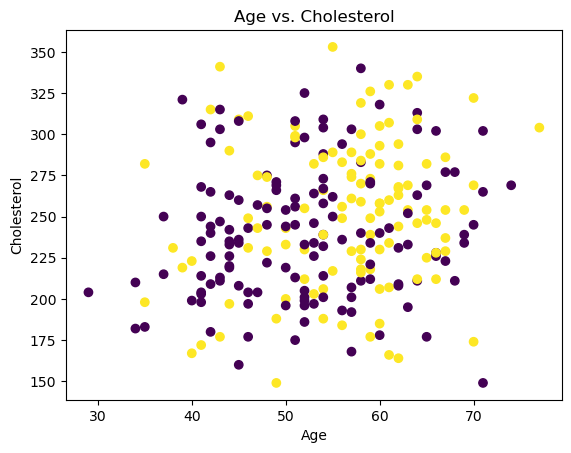

In [129]:
fig, ax = plt.subplots()
ax.scatter(df['Age'], df['Cholesterol'], c=df['HeartDisease'])
ax.set_title('Age vs. Cholesterol')
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')

In [130]:
cluster_data=df[['Cholesterol','Age']]
range_n_clusters=[2]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels=clusterer.fit_predict(cluster_data)
    silhouette_avg = silhouette_score(cluster_data, cluster_labels)
    print("For num_clusters = ", n_clusters,
        "The average silhouette coefficient is:", silhouette_avg)

For num_clusters =  2 The average silhouette coefficient is: 0.5250037119380824


Text(0, 0.5, 'Cholesterol')

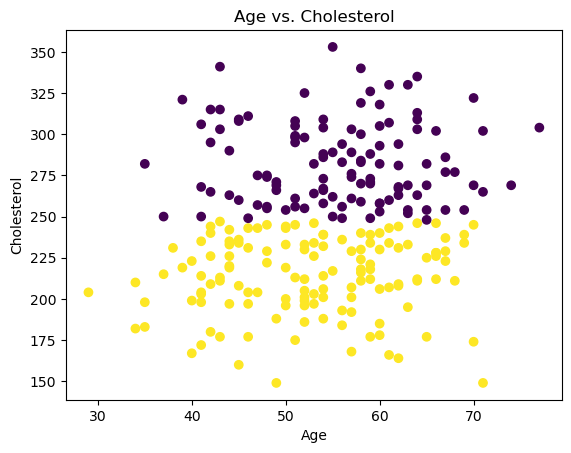

In [131]:
fig, ax = plt.subplots()
ax.scatter(df['Age'], df['Cholesterol'], c=cluster_labels)
ax.set_title('Age vs. Cholesterol')
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')

What you were trying to find out (your question)
How Age and Cholesterol were related as well as how, by analyzing Age and Cholesterol, a model could predict whether of not one has Heart Disease 

Unsupervised Question: How do simple tests and demographics such as cholesterol and age relate to Heart Disease 

Which features you tried
We tried, age, BP, cholesterol, number of vessels fluro, and many more.

Which features worked best
Our best two for the scatterplot as well as clustering (Silhouette value) were age and cholesterol. When we did color by cluster labels, two clusters were formed, upper right, and lower left. We found that upper right is mostly heart disease, and lower left is mostly no heart disease.

Which number of clusters worked best
2 clusters worked best, one for heart disease being present, one for heart disease being absent 


# **PART 5 - Supervised Learning** #

In [132]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease',
       'Cholesterol_Rating', 'EKG', 'HeartDisease'],
      dtype='object')

In [133]:
# Import necessary package
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
# Define the inputs/features for the models you'll test below
# We'll use the number of pages (standardized), number of text reviews, publication year
# and whether or not a book is in english (dummy variable)
x = df[['Sex', 'Number of vessels fluro', 'EKG results', 'Thallium', 'Slope of ST', 'ST depression', 'BP', 'Max HR']]

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "average_rating" - at least as first since we'll start with linear regression
y = df[['HeartDisease']]

# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# This is where we set our machine learning algorithm type - Decision Tree
dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
dectree.fit(x_train,y_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree = dectree.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_test, y_pred_dectree)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)



Accuracy:  74.0


In [134]:
# Just for fun

# Use binary logistic regression to look for heart disease
# Import some of the packages/libraries you need for supervised learning
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Define the inputs/features for the models you'll test below
x = df[['Sex', 'Age', 'Cholesterol', 'Number of vessels fluro', 'EKG results', 'Thallium', 'Slope of ST', 'ST depression', 'BP', 'Max HR']]
# Define the targets - what we are trying to predict or classify

# We can still use the same inputs/features/x
# We need to redefine y/output/prediction for logitistic regression

y_logreg = df[['HeartDisease']]

# Also reset our training and testing sets, since we have a new outcome
x_train, x_test, y_train, y_test = train_test_split(x, y_logreg, test_size=0.2)

# Create a Logistic Regression Classifier 
logreg1 = LogisticRegression()

# Use the training set to fit the data
logreg1.fit(x_train, y_train.values.ravel())

# Get the predictions
y_pred_logreg = logreg1.predict(x_test)

# Print the accuracy metric
# Accuracy is the correct predictions divided by the total predictions
accuracy = metrics.accuracy_score(y_test, y_pred_logreg)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_logreg))

Accuracy:  80.0
Mean squared error: 0.20


/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Real/Optimal Algorithm

In [135]:
# Use binary logistic regression to look for heart disease
# Import some of the packages/libraries you need for supervised learning
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Define the inputs/features for the models you'll test below
x = df[['Sex', 'Number of vessels fluro', 'EKG results', 'Thallium', 'Slope of ST', 'ST depression', 'BP', 'Max HR']]
# Define the targets - what we are trying to predict or classify

# We can still use the same inputs/features/x
# We need to redefine y/output/prediction for logitistic regression

y_logreg = df[['HeartDisease']]

# Also reset our training and testing sets, since we have a new outcome
x_train, x_test, y_train, y_test = train_test_split(x, y_logreg, test_size=0.2)

# Create a Logistic Regression Classifier 
logreg = LogisticRegression()

# Use the training set to fit the data
logreg.fit(x_train, y_train.values.ravel())

# Get the predictions
y_pred_logreg = logreg.predict(x_test)

# Print the accuracy metric
# Accuracy is the correct predictions divided by the total predictions
accuracy = metrics.accuracy_score(y_test, y_pred_logreg)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_logreg))

Accuracy:  78.0
Mean squared error: 0.22


/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


What you were trying to classify or predict (your question)

Supervised Question: How do someones demographics (sex) as well as more complicated tests such as EKG results, Thallium, Max HR, ST Depression, Slope of ST, number of vessels fluro, and BP relate to Heart Disease

Which features you used

We tried every single feature (besides heart disease) but some ended up harming our final results or were used in the unsupervised question

Which algorithms you tried

We tried KNN, Decision Tree, and logistic regression

Which algorithms worked the best and why
KNN was the worst (avg accuracy of low 60s), decision tree worked well (avg accuracy of high 70s, and logistic regression with a test size of .2 worked very well (avg accuracy of low 80s). We believe that logistic regression worked well because it was able to take in many important features and generate an accurate equation/model for predicting the presence/absence of Heart Disease


Evaluation

In [136]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_logreg)

array([[17,  4],
       [ 7, 22]])

/usr/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[17,  4],
       [ 7, 22]])

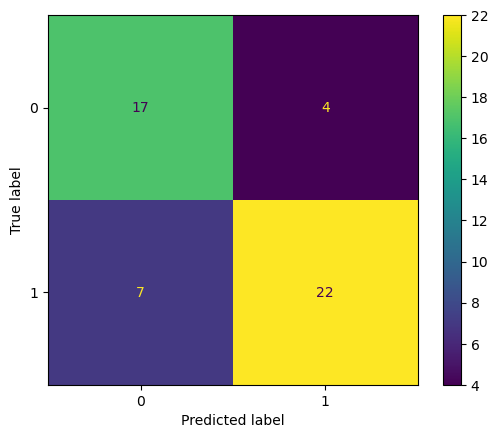

In [137]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, x_test, y_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_logreg)

In [138]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred_logreg)
print('Accuracy: ',a)
# Recall
from sklearn.metrics import recall_score
b = recall_score(y_test, y_pred_logreg, average=None)
print('Recall: ',b)
# Precision
from sklearn.metrics import precision_score
c = precision_score(y_test, y_pred_logreg, average=None)
print('Precision: ',c)
from sklearn.metrics import f1_score
d = f1_score(y_test,y_pred_logreg, average=None)
print('F1 score: ',d)

print(metrics.classification_report(y_test,y_pred_dectree, digits = 3))

Accuracy:  0.78
Recall:  [0.80952381 0.75862069]
Precision:  [0.70833333 0.84615385]
F1 score:  [0.75555556 0.8       ]
              precision    recall  f1-score   support

           0      0.481     0.619     0.542        21
           1      0.652     0.517     0.577        29

    accuracy                          0.560        50
   macro avg      0.567     0.568     0.559        50
weighted avg      0.580     0.560     0.562        50



# **PART 6 - Deep Learning** #

In [139]:
#Run this Colab on TensorFlow 2.x
# %tensorflow_version 2.x
import tensorflow as tf


In [140]:
# build_model(my_learning_rate), which    builds an empty model.
# train_model(model, feature, label, epochs), which trains the model from the examples (feature and label) you pass.

#Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [141]:
#Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [142]:
df['BP']=(df['BP']-df['BP'].min()) / (df['BP'].max()-df['BP'].min())
df['Age']=(df['Age']-df['Age'].min()) / (df['Age'].max()-df['Age'].min())
df['Max HR']=(df['Max HR']-df['Max HR'].min()) / (df['Max HR'].max()-df['Max HR'].min())
df['Number of vessels fluro']=(df['Number of vessels fluro']-df['Number of vessels fluro'].min()) / (df['Number of vessels fluro'].max()-df['Number of vessels fluro'].min())
df['Cholesterol']=(df['Cholesterol']-df['Cholesterol'].min()) / (df['Cholesterol'].max()-df['Cholesterol'].min())

In [143]:
df['MaxHR']=df['Max HR']
df['Number_of_vessels_fluro']=df['Number of vessels fluro']
BP_list=df.BP.values.tolist()
Number_of_vessels_fluro_list=df.Number_of_vessels_fluro.values.tolist()
Max_HR_list=df.MaxHR.values.tolist()
Cholesterol_list=df.Cholesterol.values.tolist()
Age_list=df.Age.values.tolist()

my_label=[]
for i in range(len(df)):
    my_label.append(BP_list[i] + Max_HR_list[i] + Number_of_vessels_fluro_list[i] + Age_list[i])

my_feature=Cholesterol_list

Epoch 1/225
1/1 [==============================] - 0s 202ms/step - loss: 6.5770 - root_mean_squared_error: 2.5646
Epoch 2/225
1/1 [==============================] - 0s 3ms/step - loss: 6.3421 - root_mean_squared_error: 2.5184
Epoch 3/225
1/1 [==============================] - 0s 3ms/step - loss: 6.1759 - root_mean_squared_error: 2.4851
Epoch 4/225
1/1 [==============================] - 0s 3ms/step - loss: 6.0393 - root_mean_squared_error: 2.4575
Epoch 5/225
1/1 [==============================] - 0s 3ms/step - loss: 5.9198 - root_mean_squared_error: 2.4331
Epoch 6/225
1/1 [==============================] - 0s 3ms/step - loss: 5.8118 - root_mean_squared_error: 2.4108
Epoch 7/225
1/1 [==============================] - 0s 4ms/step - loss: 5.7120 - root_mean_squared_error: 2.3900
Epoch 8/225
1/1 [==============================] - 0s 3ms/step - loss: 5.6185 - root_mean_squared_error: 2.3703
Epoch 9/225
1/1 [==============================] - 0s 3ms/step - loss: 5.5300 - root_mean_squared_erro

/usr/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


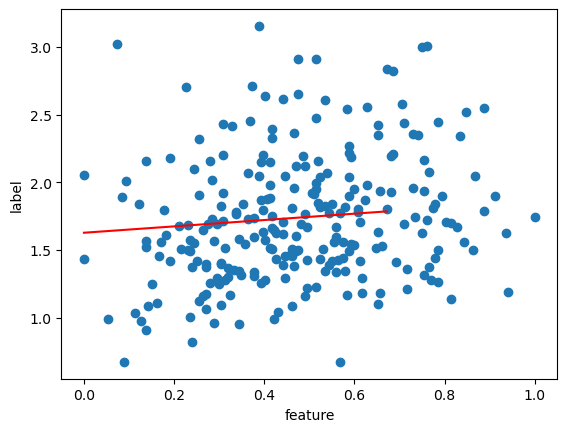

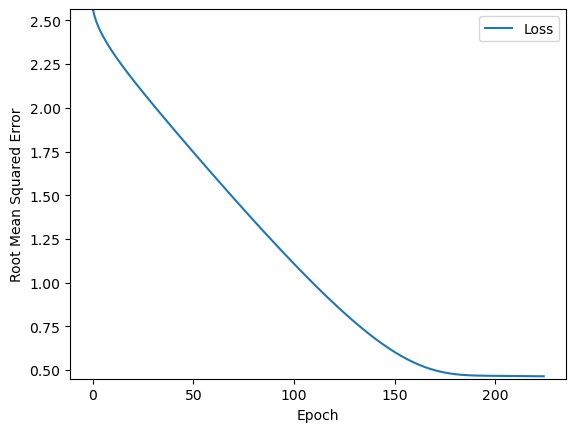

In [144]:
learning_rate=0.01
epochs=225
my_batch_size=270

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# **PART 7 - Presentation** #


Wow! You did it! Your first AI project from start to finish! Congratulations!

---

Finalize your project, and fill out the presentation templates (You can find the powerpoint templates in "Resources"). Links for google drive versions of the templates are here:

Slides:

Poster:


---




[![photo link](https://media.giphy.com/media/jS27LWasgUIYrXtP83/giphy.gif)]